In [1]:
!pip install fastdup

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.2/75.2 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.9/243.9 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 14.4 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
  Attempting uninstall: charset-normalizer
    Found existing installation: charset-normalizer 3.3.1
    Uninstalling charset-normalizer-3.3.1:
      Successfully uninstalled charset-normalizer-3.3.1
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all th

## Connect to google drive

In [2]:
# Read readme.md from github
from google.colab import drive
drive.mount('/gdrive')
%cd "/gdrive/My Drive/Challenge_1/"

Mounted at /gdrive
/gdrive/My Drive/Challenge_1


## Imports

In [3]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.12.0


## Import data

In [4]:
import numpy as np
import cv2

# Load the NPZ file
data = np.load('new_dataset.npz')

In [28]:
images = data["data"]

## Convert images to jpg

In [29]:
import os
from PIL import Image
import numpy as np
from tqdm.auto import tqdm

# Create a mapping from integer labels to string names
label_names = np.array(["healthy", "unhealthy"])  # Note: Corrected the array definition

# Create folder to store the images in Colab's local disk
root_dir = '/content/images'  # Use the '/content' directory in Colab
os.makedirs(root_dir, exist_ok=True)

# Get the total number of samples in the dataset
n_samples = len(data["data"])

# Iterate through the dataset to save images
for i, (image, label) in enumerate(zip(images, data["labels"])):
    # Convert integer label to string name
    label_name = label

    # Create class directory if it doesn't exist
    class_dir = os.path.join(root_dir, label_name)
    os.makedirs(class_dir, exist_ok=True)

    # Define image path and save image
    image_path = os.path.join(class_dir, f'image_{i}.jpg')
    img = np.squeeze(image)  # Remove any singleton dimensions
    img = Image.fromarray(image.astype('uint8'))
    img.save(image_path)


## Load images to dataframe

In [17]:
import pandas as pd

# Get a list of file paths for all JPEG files in the directory and its subdirectories
file_paths = []
labels = []
for root, dirs, files in os.walk('/content/images'):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg')):
            file_paths.append(os.path.join(root, file))
            labels.append(os.path.basename(root))

# Create a pandas dataframe from the list of file paths and labels
df = pd.DataFrame({'filename': file_paths, 'label': labels, 'split': 'train'})

# Print the resulting dataframe
df

filename      label  split
0       /content/images/healthy/image_4978.jpg    healthy  train
1       /content/images/healthy/image_3215.jpg    healthy  train
2        /content/images/healthy/image_197.jpg    healthy  train
3       /content/images/healthy/image_4346.jpg    healthy  train
4       /content/images/healthy/image_5010.jpg    healthy  train
...                                        ...        ...    ...
5195  /content/images/unhealthy/image_2247.jpg  unhealthy  train
5196  /content/images/unhealthy/image_3428.jpg  unhealthy  train
5197  /content/images/unhealthy/image_1479.jpg  unhealthy  train
5198  /content/images/unhealthy/image_4521.jpg  unhealthy  train
5199  /content/images/unhealthy/image_1392.jpg  unhealthy  train

[5200 rows x 3 columns]

## FastDup

In [22]:
import fastdup
fd = fastdup.create(input_dir='/content/images', work_dir='/content/aa')
fd.run(annotations=df)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
fastdup C++ info received:  2023-11-06 00:35:59 [INFO] Going to loop over dir /tmp/tmpi_dq13x2.csv
2023-11-06 00:35:59 [INFO] Found total 5200 images to run on, 5200 train, 0 test, name list 5200, counter 5200 
2023-11-06 00:37:30 [INFO] Found total 5200 images to run on
2023-11-06 00:37:33 [INFO] 2896) Finished write_index() NN model
2023-11-06 00:37:33 [INFO] Stored nn model index file /content/aa/nnf.index
2023-11-06 00:37:34 [INFO] Total time took 94936 ms
2023-11-06 00:37:34 [INFO] Found a total of 923 fully identical images (d>0.990), which are 8.88 % of total graph edges
2023-11-06 00:37:34 [INFO] Found a total of 0 nearly identical images(d>0.980), which are 0.00 % of total graph edges
2023-11-06 00:37:34 [INFO] Found a total of 7512 above threshold images (d>0.900), which are 72.23 % of total graph edges
2023-11-06 00:37:34 [INFO] Found a total of 537 outlier images         (d<0.050), which are 5.16 % o

0

### Image groupings

healthy


Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Finished OK. Components are stored as image files /content/aa/galleries/components_[index].jpg
Stored components visual view in  /content/aa/galleries/components.html
Execution time in seconds 2.4
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



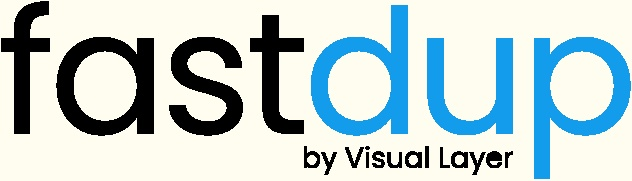
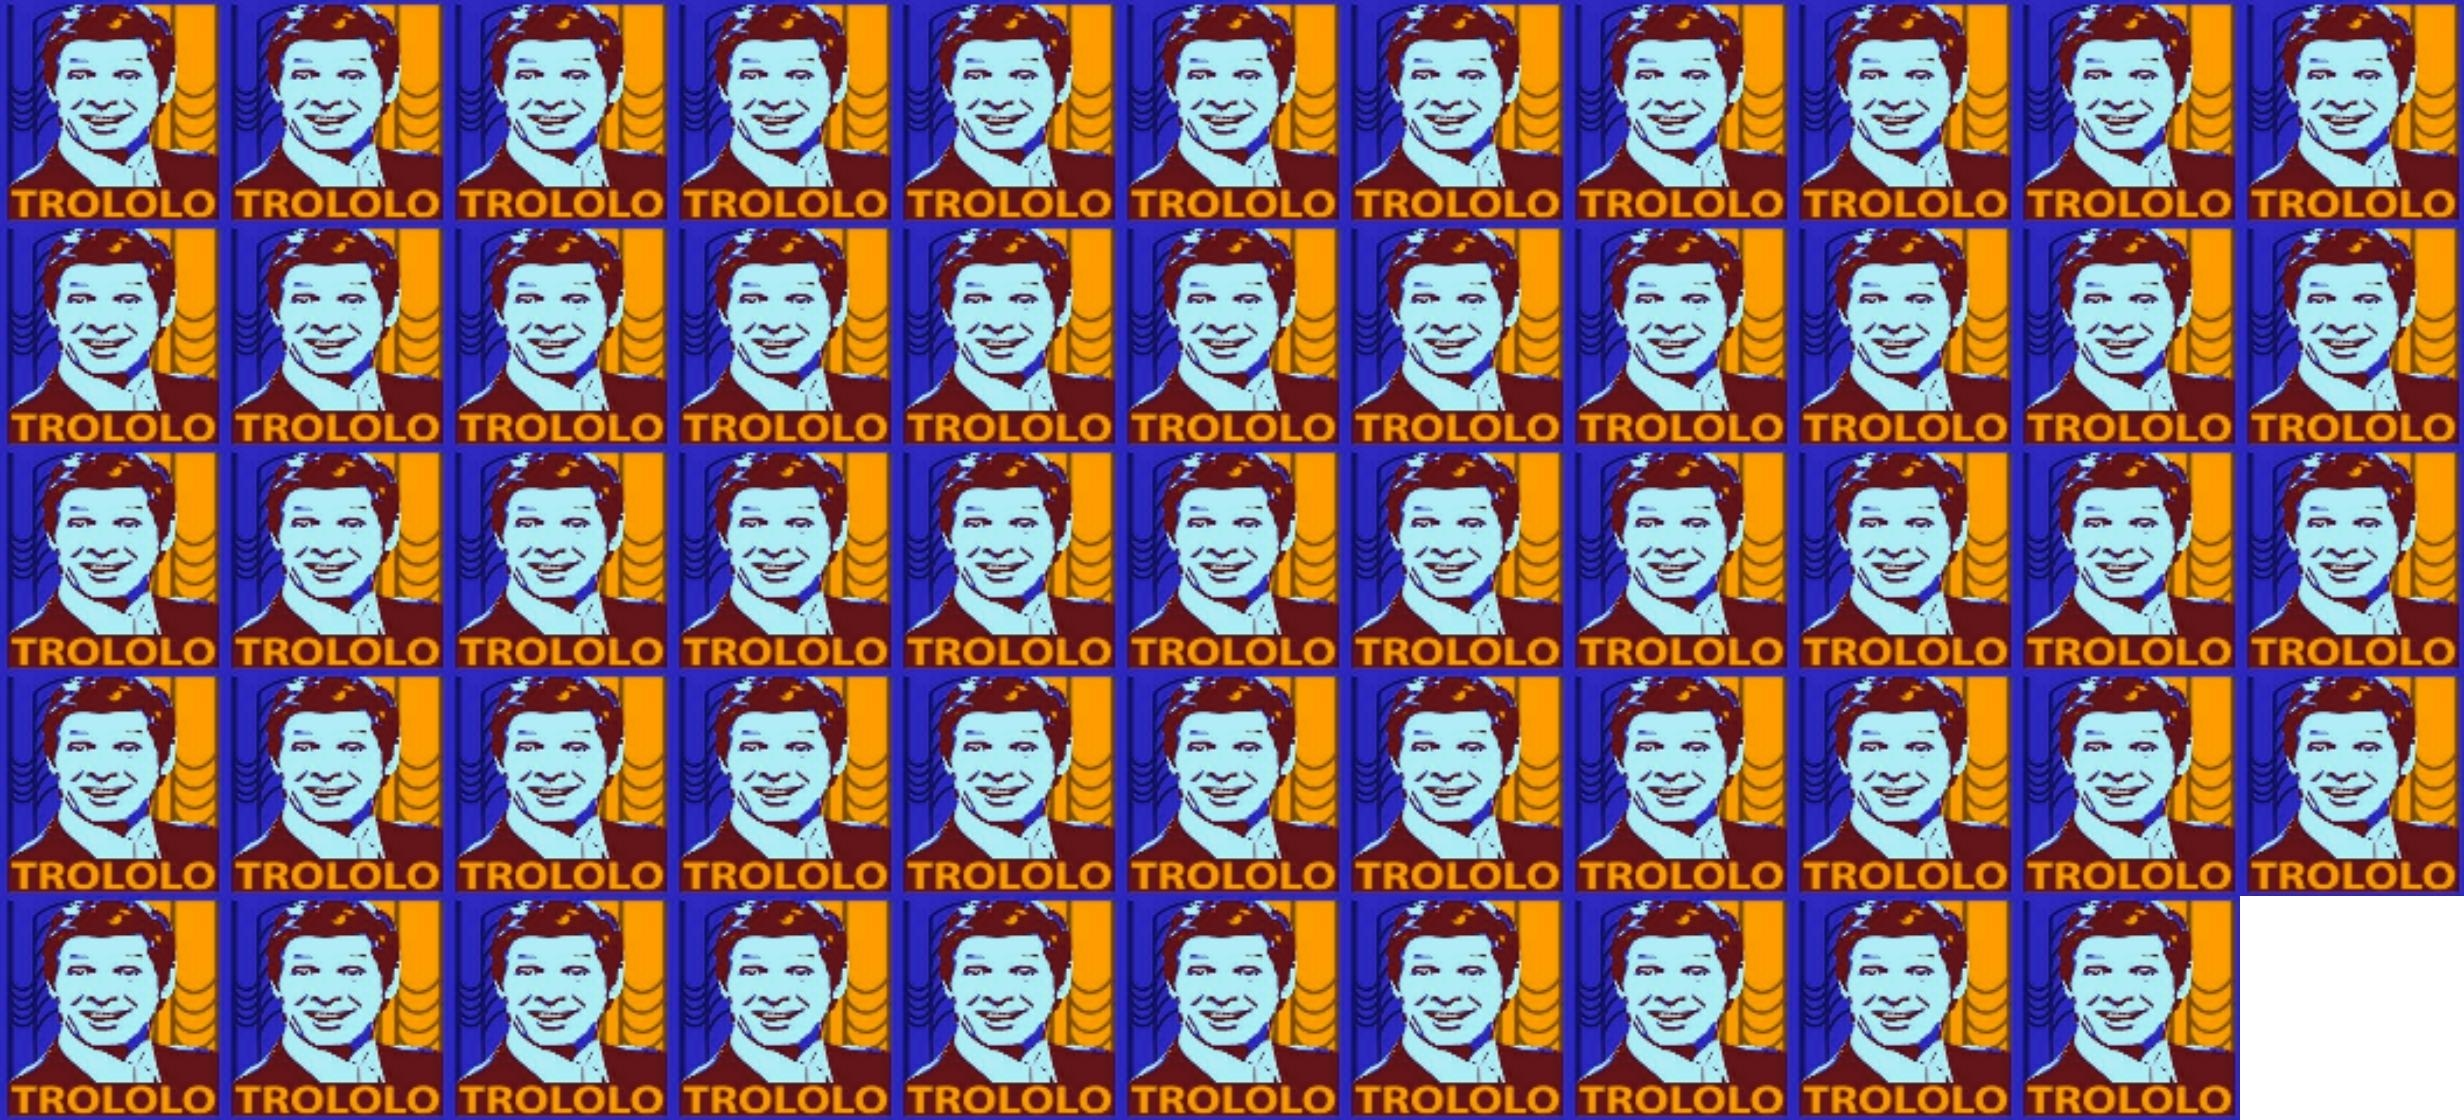
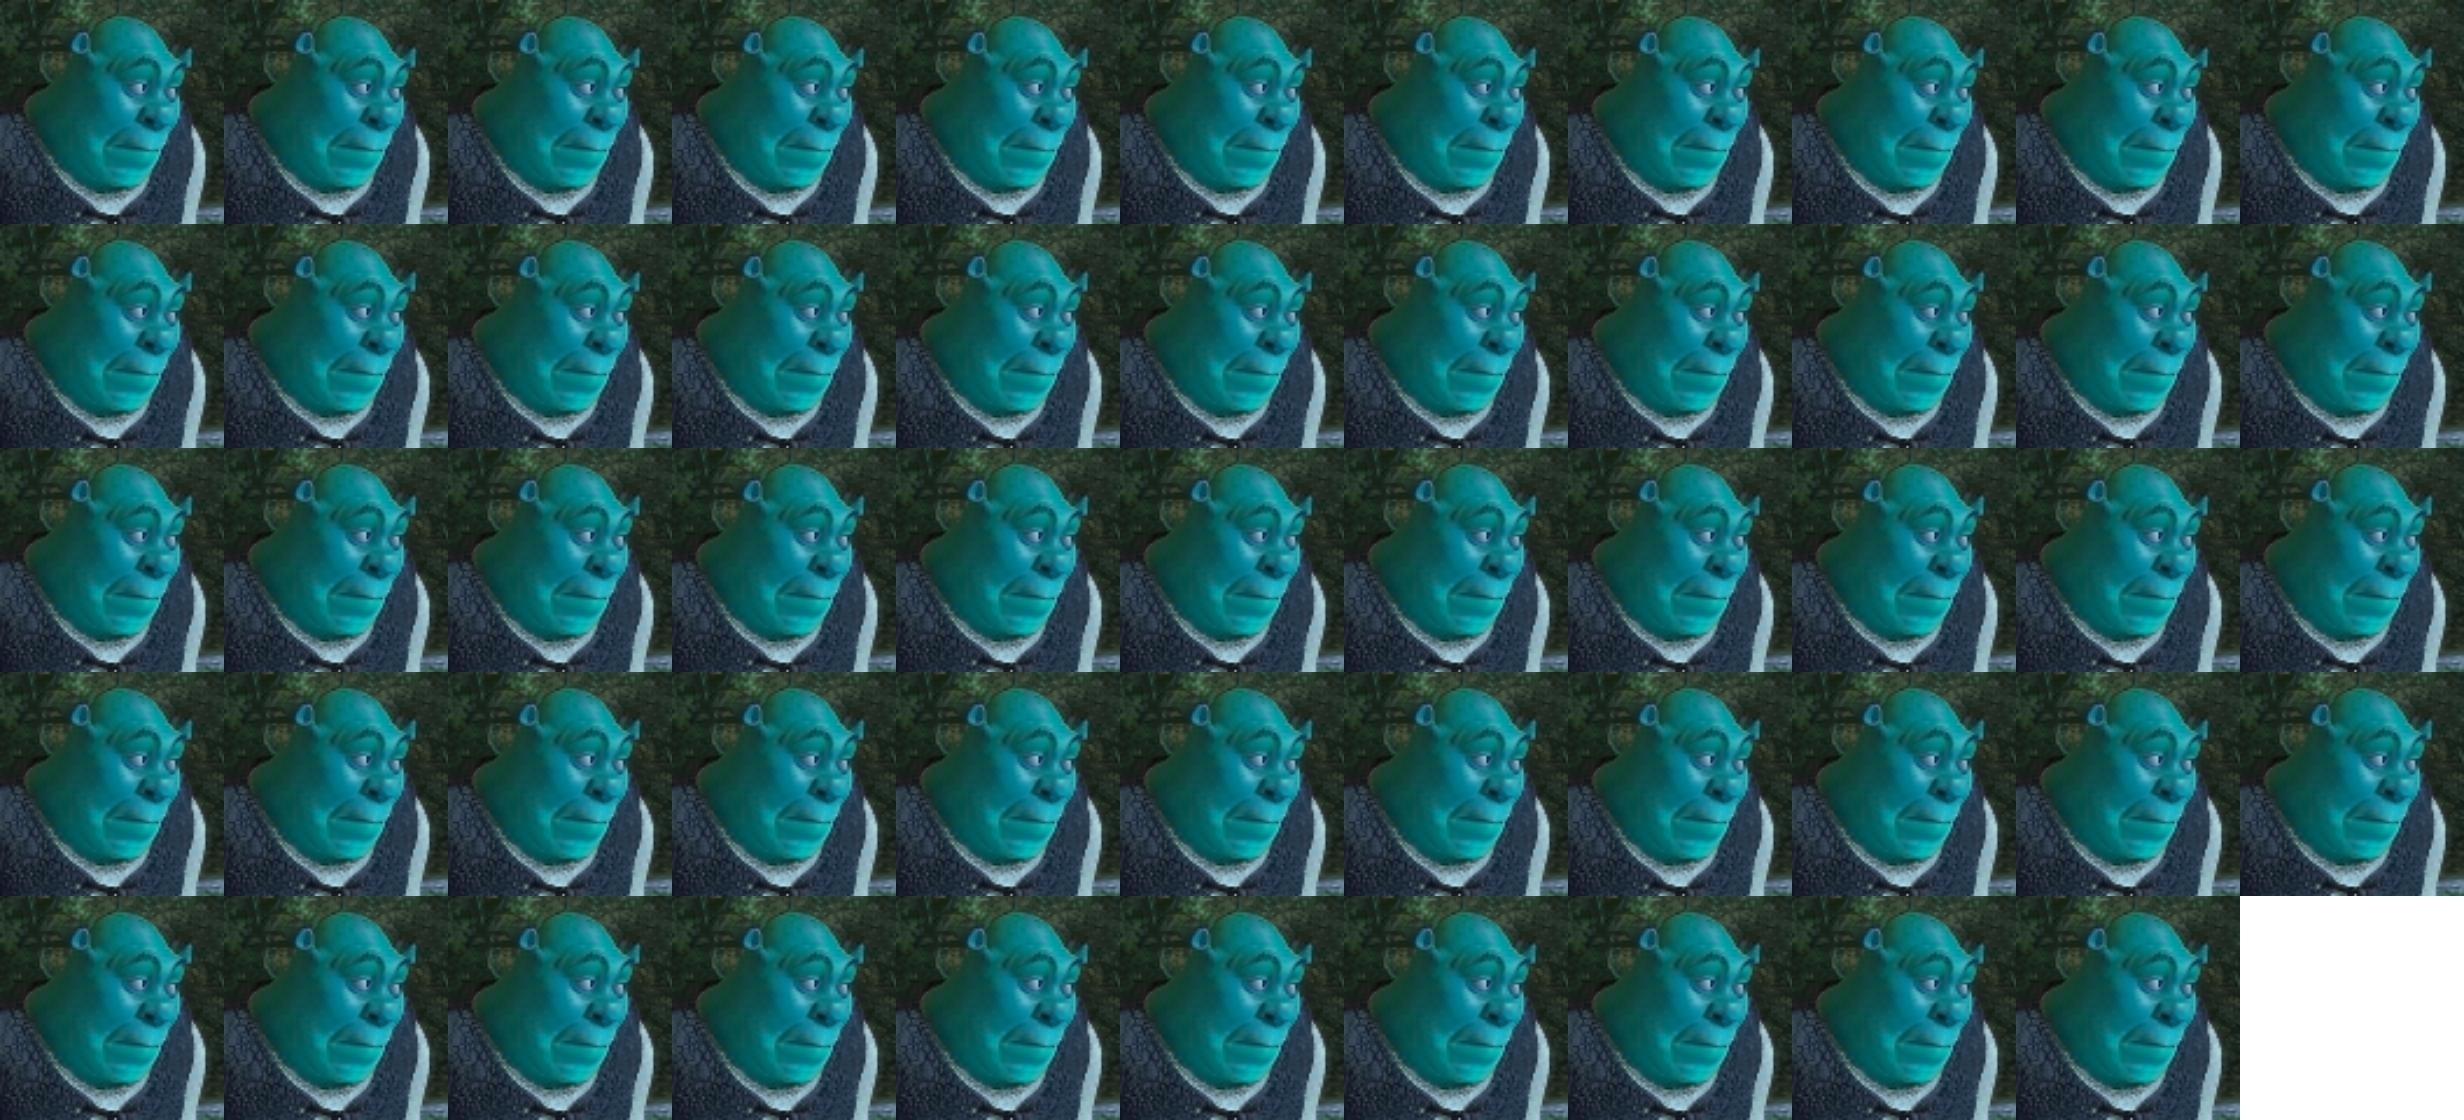
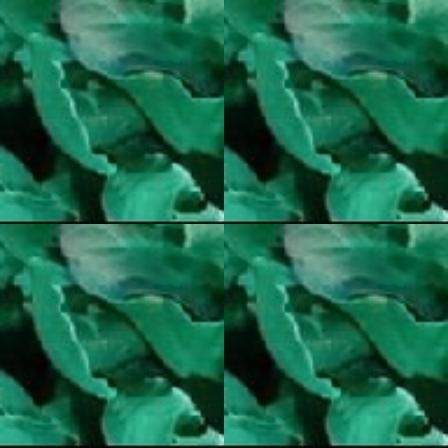
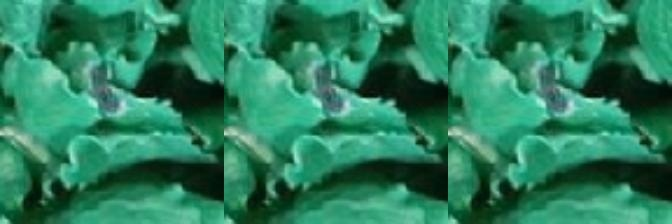
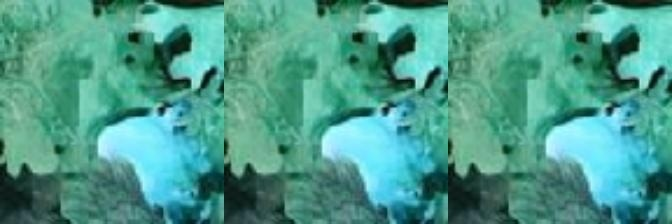
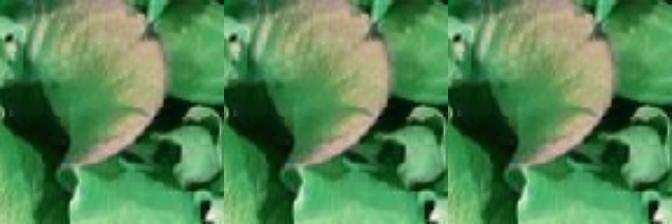
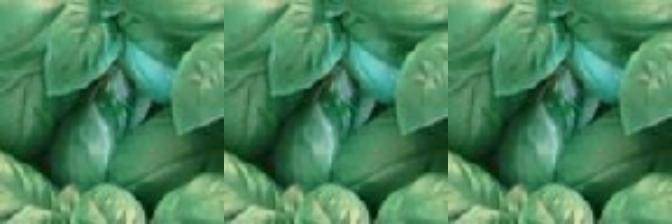
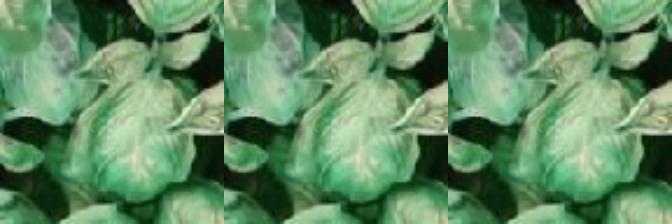
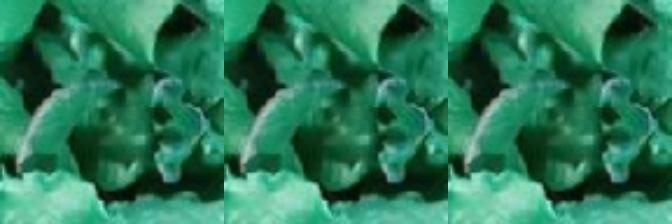
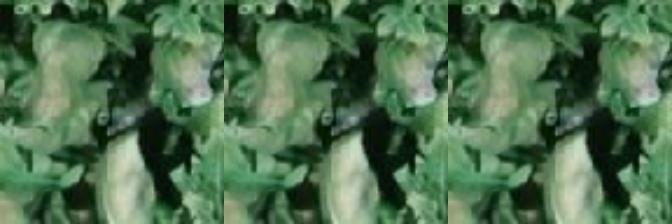
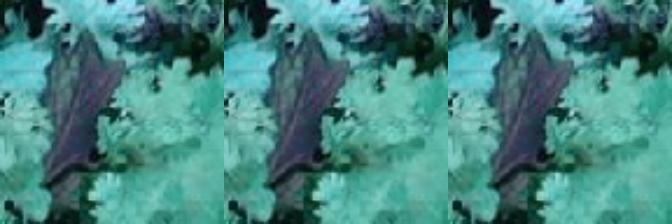
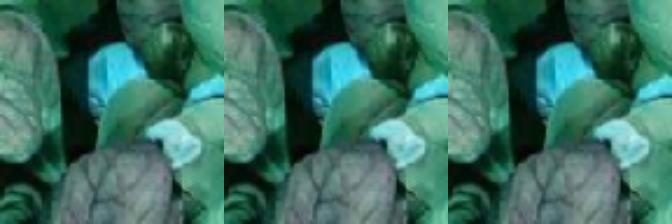
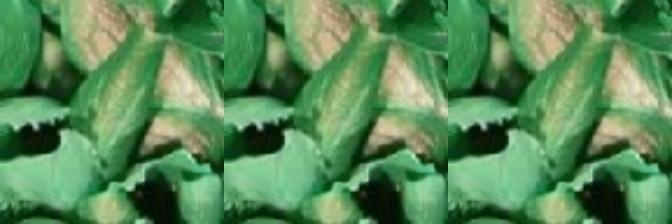
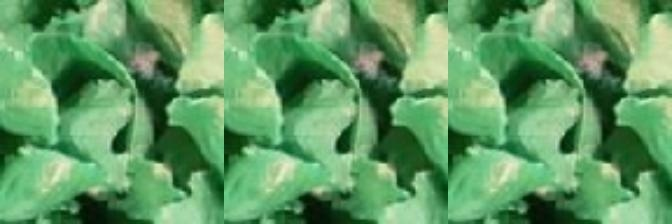
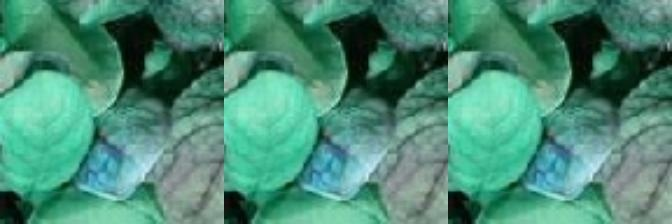
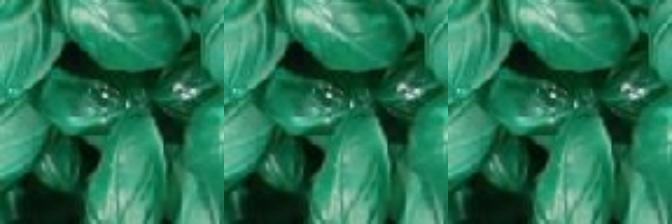
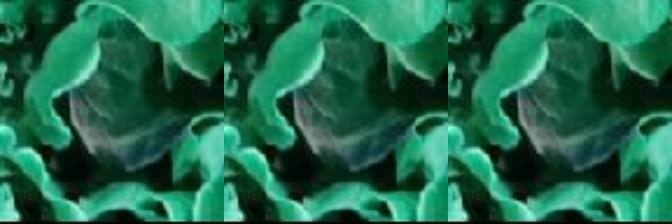
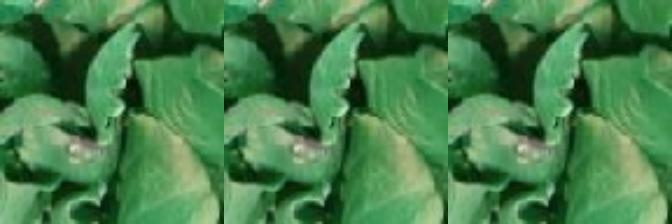
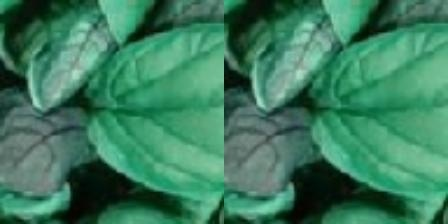
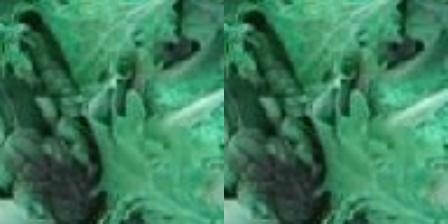

0

In [23]:
fd.vis.component_gallery()

### Duplicates

Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Stored similarity visual view in  /content/aa/galleries/duplicates.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



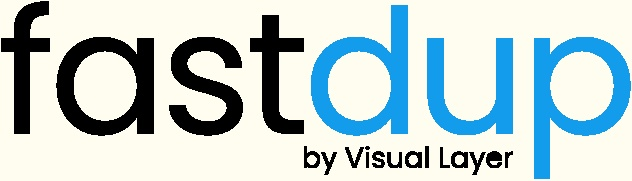
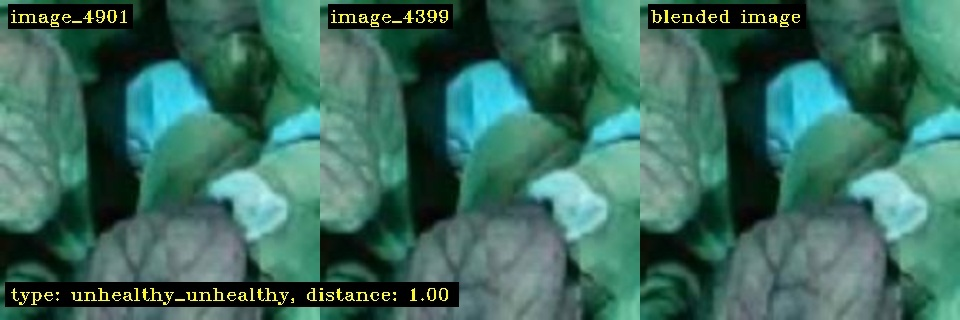
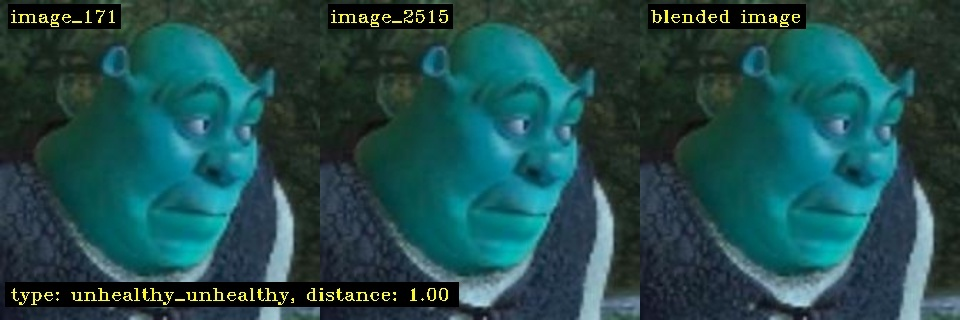
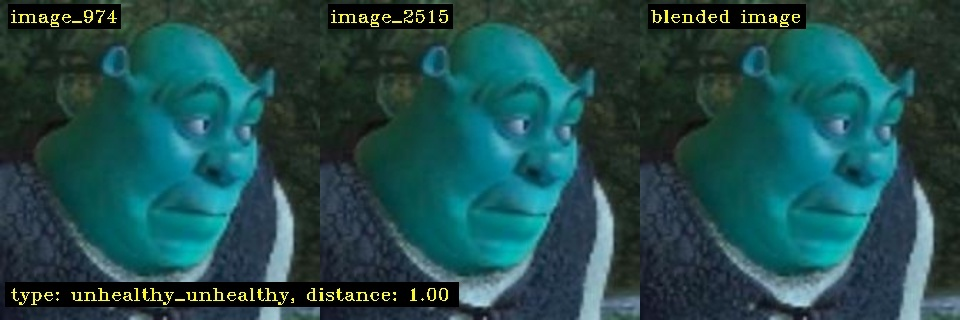
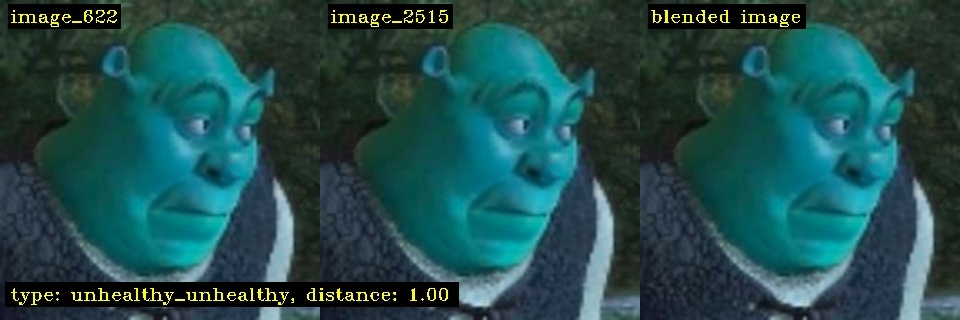
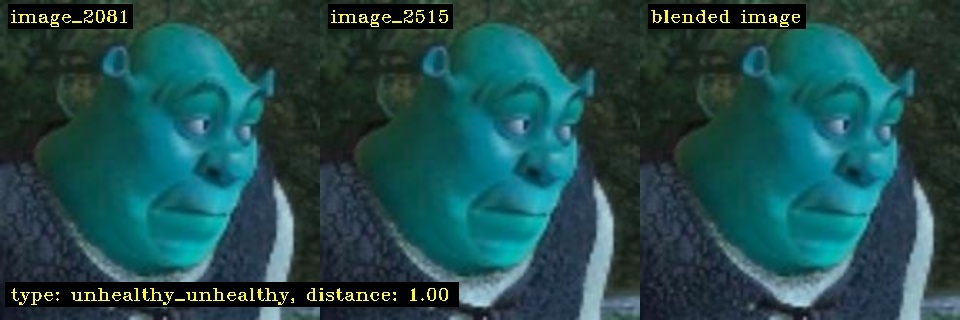
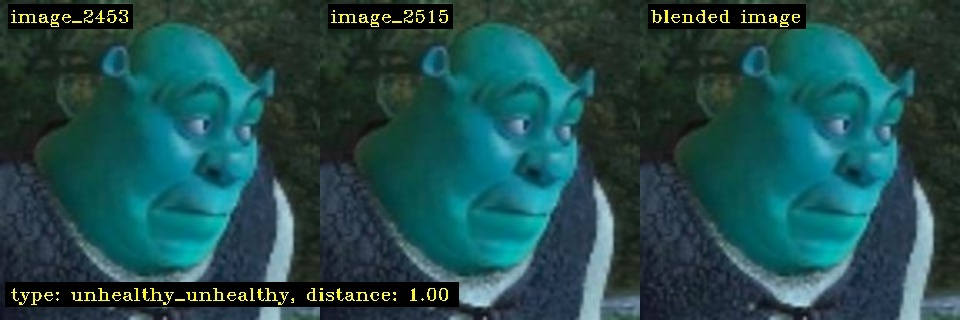
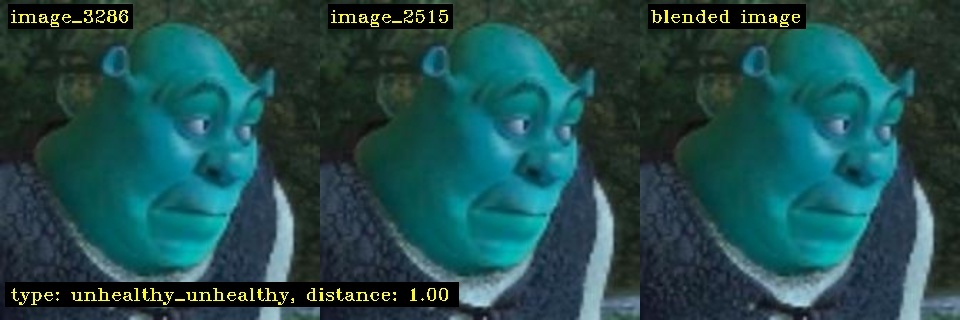
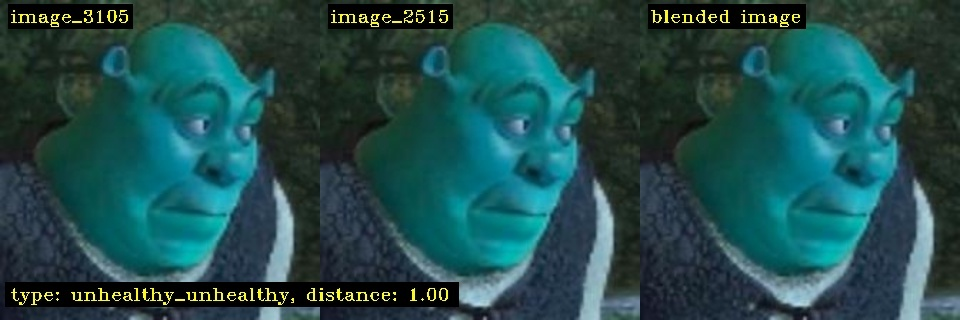
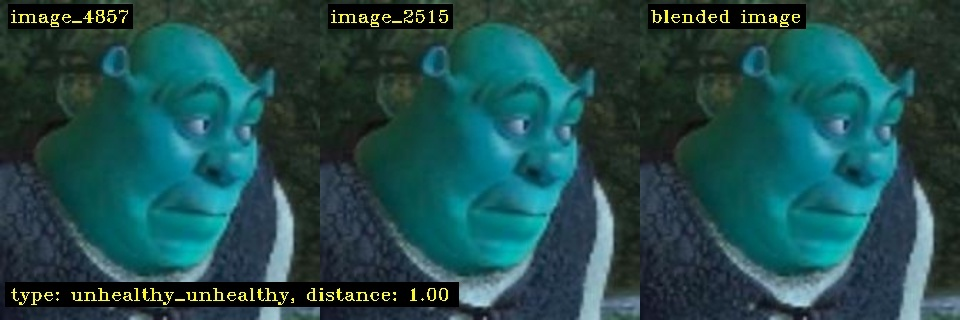
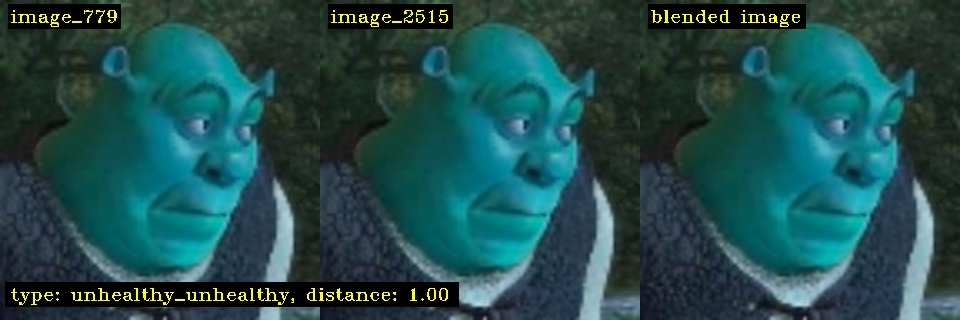
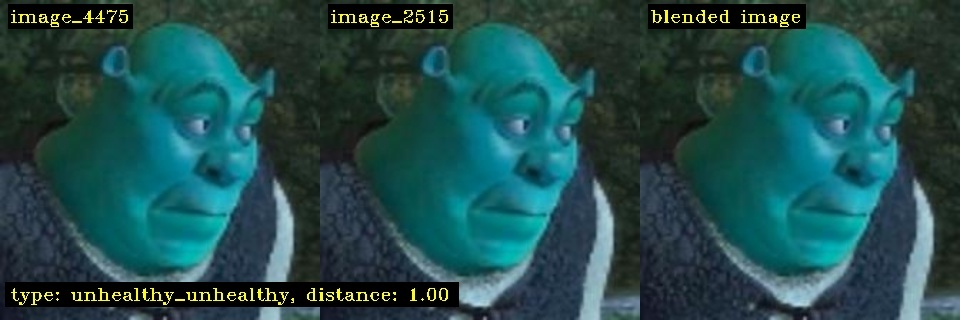
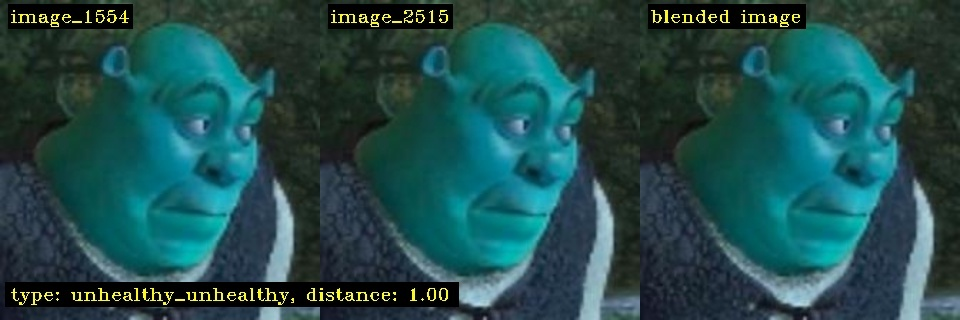
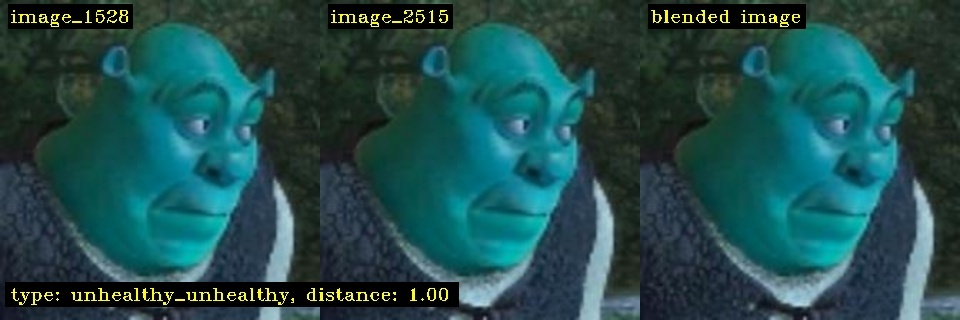
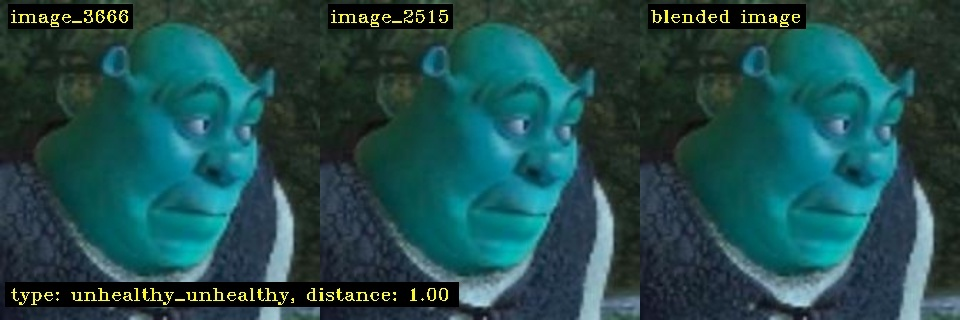
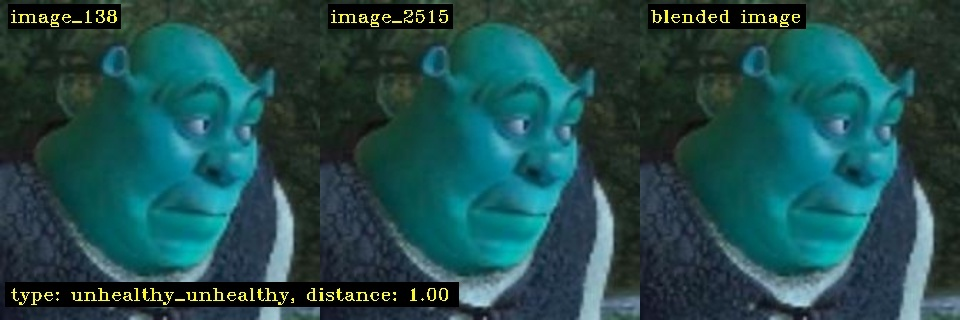
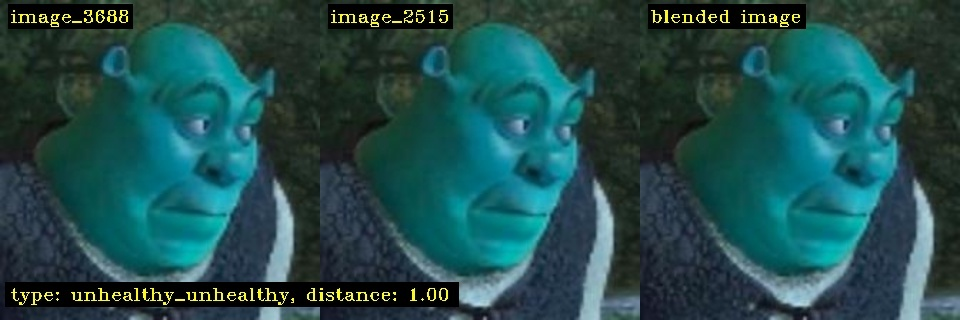
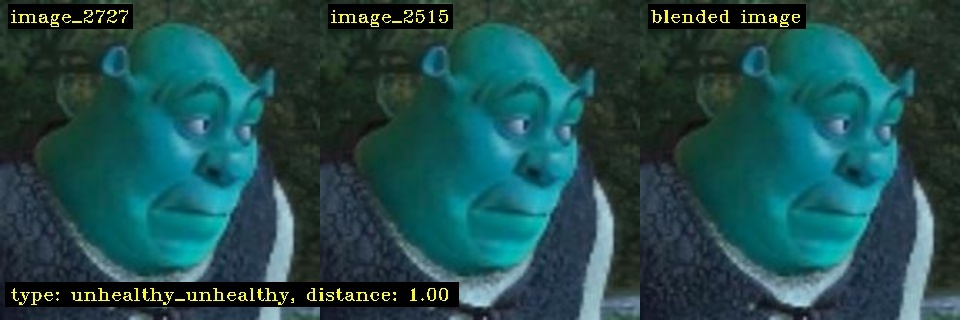
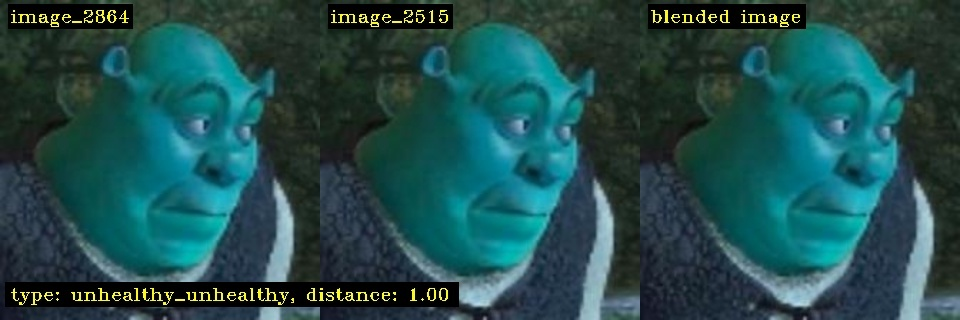
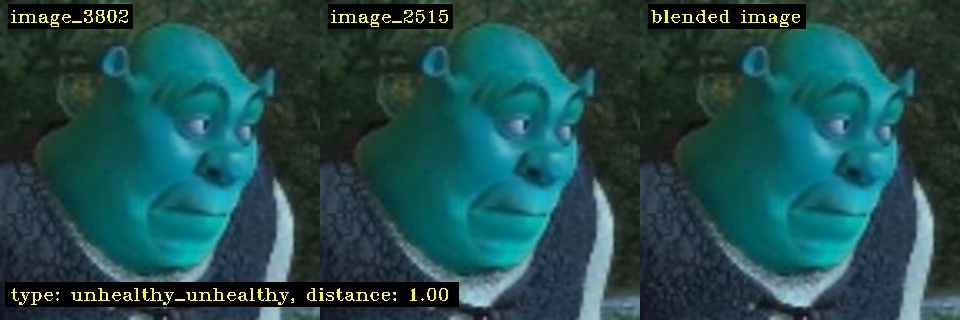
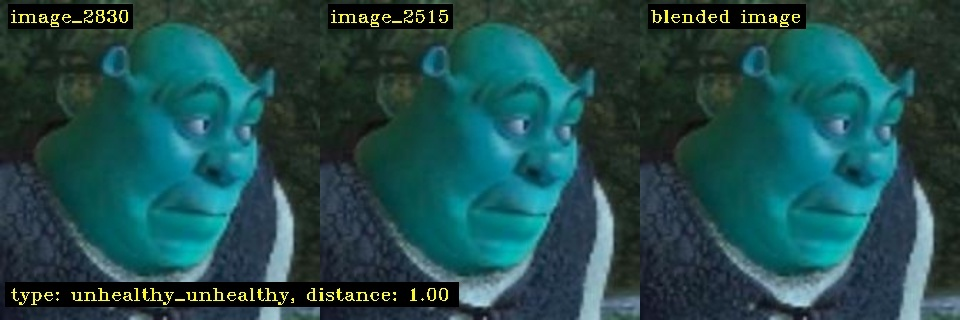

0

In [26]:
fd.vis.duplicates_gallery()

### Outliers

Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Stored outliers visual view in  /content/aa/galleries/outliers.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



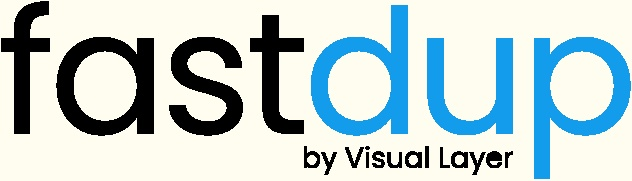
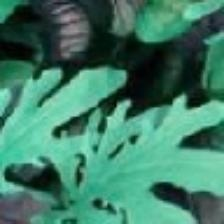
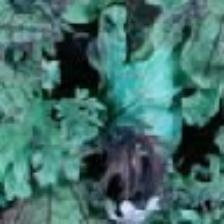
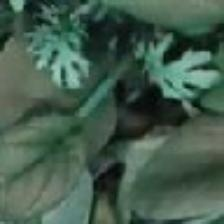
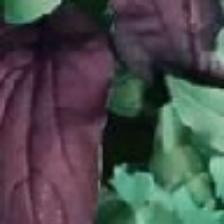
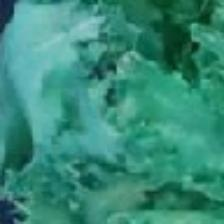
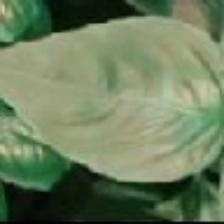
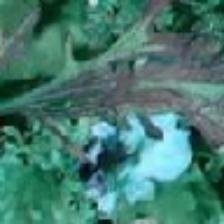
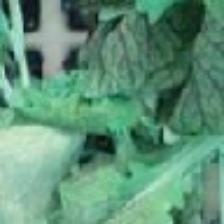
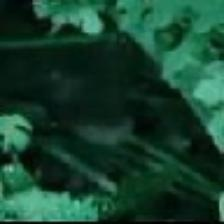
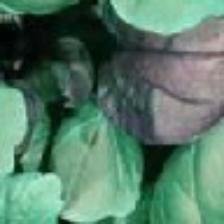
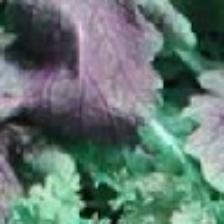
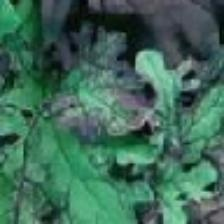
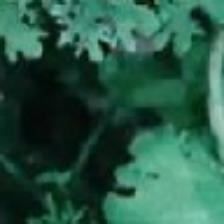
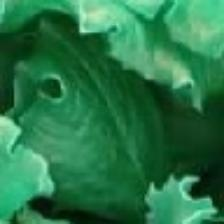
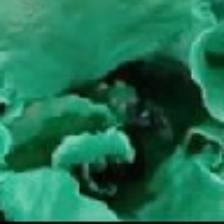
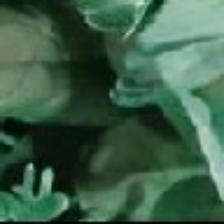
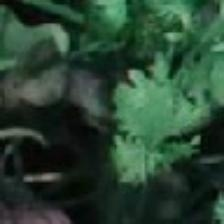
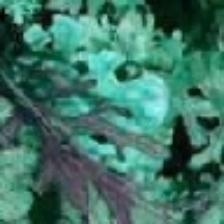
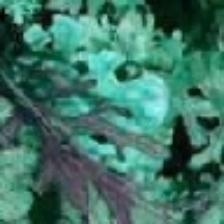
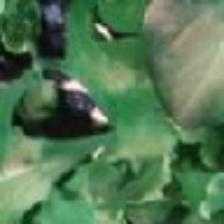

0

In [24]:
fd.vis.outliers_gallery()


### Too dark

Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Stored mean visual view in  /content/aa/galleries/mean.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



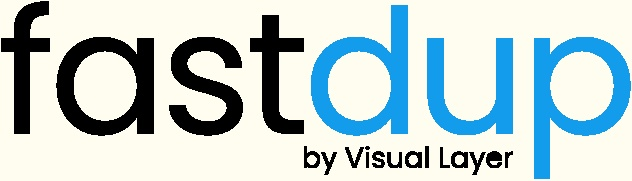
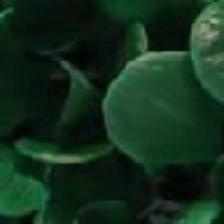
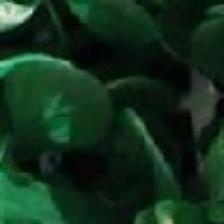
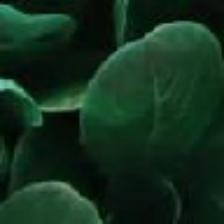
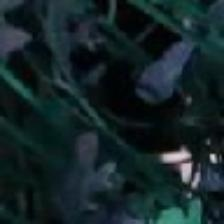
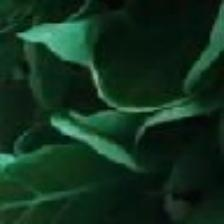
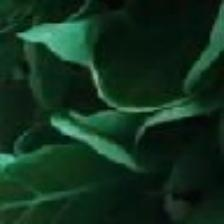
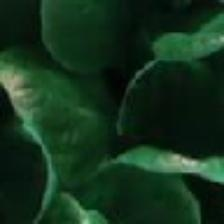
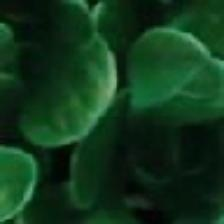
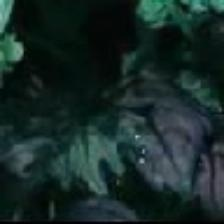
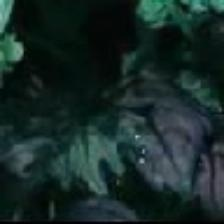
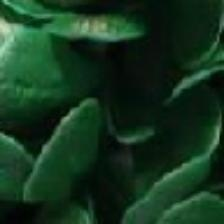
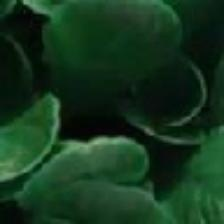
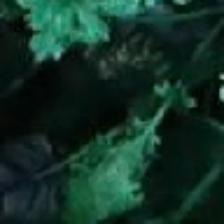
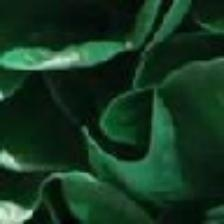
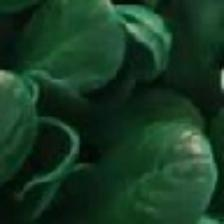
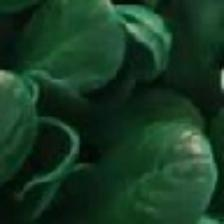
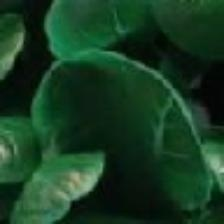
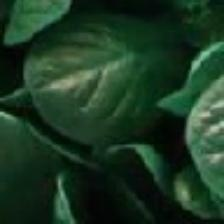
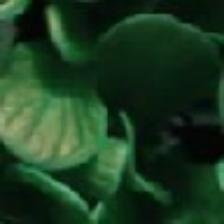
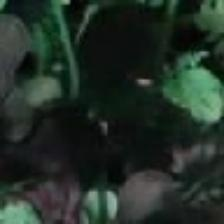

0

In [25]:
fd.vis.stats_gallery(metric='dark')